In [2]:
# Import the libraries

%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
seed = 42
rng = np.random.RandomState(seed)

In [4]:
data = pd.read_csv("./../../CV101/datasets/emergency_classification/emergency_classification.csv")

In [5]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [6]:
! ls ./../../CV101/datasets/emergency_classification/

emergency_classification.csv  images


In [7]:
path="./../../CV101/datasets/emergency_classification/images/"
X=[]
for localimage in data.image_names:
    img = plt.imread(path+localimage)
    X.append(img)
X = np.array(X)

In [8]:
X.shape

(2352, 224, 224, 3)

In [9]:
y = data.emergency_or_not.values

In [10]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
X_train,X_test, y_train, y_test = train_test_split(X , y, test_size =0.3,random_state=seed)

In [12]:
X_train.shape

(1646, 224, 224, 3)

In [13]:

model=Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Conv2D(filters=25,kernel_size=(5,5),activation='relu',strides=(1,1),padding ='valid'))
model.add(Conv2D(filters=50,kernel_size=(5,5),activation='relu',strides=(1,1),padding ='valid'))
model.add(MaxPool2D(pool_size=(4,4),padding='valid'))
model.add(Flatten())
model.add(Dense(units=100,activation='sigmoid'))
model.add(Dense(units=1,activation='sigmoid'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 145800)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               14580100  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total para

In [16]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [17]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 364s 221ms/step - loss: 0.7143 - acc: 0.5608 - val_loss: 0.6889 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 289s 175ms/step - loss: 0.6787 - acc: 0.5863 - val_loss: 0.6912 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 412s 250ms/step - loss: 0.6790 - acc: 0.5863 - val_loss: 0.6857 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 353s 215ms/step - loss: 0.6795 - acc: 0.5863 - val_loss: 0.6885 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 336s 204ms/step - loss: 0.6794 - acc: 0.5863 - val_loss: 0.6875 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 383s 233ms/step - loss: 0.6789 - acc: 0.5863 - val_loss: 0.6862 - val_acc: 0.5609
Epoch 7/10
1646/1646 [==============================] - 398s 242ms/step - loss: 0.6793 - acc: 0.5863 - val_loss: 0.6865 - val

In [18]:
predictions = model.predict_classes(X_test)[:,0]
predictions_probabilities = model.predict(X_test)[:,0]

In [20]:
_,valid_vehicle, _ ,_ = train_test_split(data.image_names.values,y,test_size=0.3,random_state=seed)
index = rng.choice(range(len(valid_vehicle)))
image_name = data.image_names[index]

87.jpg
41
actual class =  1


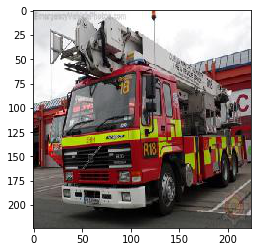

In [46]:
path="./../../CV101/datasets/emergency_classification/images/"

_,valid_vehicle, _ ,_ = train_test_split(data.image_names.values,y,test_size=0.3,random_state=seed)

index = rng.choice(range(len(valid_vehicle)))
image_name = data.image_names[index]
print(image_name)
prob = (predictions_probabilities*100 )[index].astype(int)

img= plt.imread(path+image_name)
plt.imshow(img)
print(prob)
print("actual class = ",y_test[index])

In [52]:
print(y_train)

[0 0 0 ... 0 0 1]


In [51]:
print(y_test)

[0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0
 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1
 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1
 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0
 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1
 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1
 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0
 1 0 0 0 1 0 1 0 1 0 1 1 